In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [160]:
df = pd.read_csv("elderly_opinions.csv")
smucolors = ["#151C55","#8A704C"]

for col in df:
    #get dtype for column
    dt = df[col].dtype 
    #check if it is a number
    if dt == int or dt == float:
        df[col] = df[col].fillna(0)
    else:
        df[col] = df[col].fillna("-")
        
df.shape


(24, 30)

In [161]:
df.head(5)

,Gender性别Jantina,Age岁数\nUmur,Where do you live?请问您住在哪里？\nAnda tinggal dekat mana?,Are you working currently?你现在还有工作吗？Adakah anda masih berkerja?,How often do you come to Bras Basah-Bugis District?你有常来这个地区吗？如果有，请问您多常来？Apakah kekerapan anda datang ke Bras Basah-Bugis District?,What kind of activities do you do in your free time?请问您有空的时候会参与什么活动？\nApakah aktiviti-aktiviti yang anda lakukan pada masa lapang?,"Do you wish you can have an opportunity to interact more with the youth?请问您有没有意念与青年们交流？Jika diberi peluang, adakah anda ingin berinteraksi dengan belia/orang muda?",How often do you exercise?你有运动的吗？如果有，请问你多时常做运动？Berapa kali kamu bersen...,What is your reason for not exercising? 请问为什么您没有运动的习惯？Apakah sebab anda tidak bersenam?,What are some forms of exercise which you do?你都会做什么种类的运动？Apakah jenis senaman atau sukan yang anda lakukan?,...,What would you say is your understanding of technology?你觉得你对科技的了解有多少？Seberapa dalam pengetahuan anda tentang teknologi?,"If no understanding or very little understanding, what do you think is the reason?你觉得为什么会完全不懂或懂得很少呢？Jika pengetahuan anda tidak cukup, apakah sebabnya?",What kind of technologies and/or apps do you use?请问您有用到哪一种科技或应用程式？Apakah jenis teknologi/applikasi yang anda gunakan?,Would you like to learn more about using various technologies or apps if there are free courses/guidance by youths?假如大学生可以举办免费的课程或指点，您会想要多了解多样化的科技或应用程式吗？Akankah anda belajar tentang teknologi ataupun applikasi jika pelajar universiti memberikan kursus/bimbingan percuma?,"If yes, what would you want to learn?如果您想要学，您会想要学什么？\nApakah yang anda ingin ketahui?",Do you know how to shop online? 请问您懂得如何在网上购物吗？Adakah anda ketahui cara-cara membeli belah dalam talian?,"If yes, What are some reasons you shop online?请问您可以透露您网上购物的原因吗？Kenapa anda suka membeli belah dalam talian?",What are some reasons you don't shop online?请问您不使用网上购物的原因是什么？Kenapa anda tidak suka membeli belah dalam talian?,"If there are guidance, do you wish you know how to shop online safely to make your life more convenient?如果我们给与指点，您是否会想了解如何安全地在网上购物，好让您的生活更方便？Jika ada pertolongan, adakah kamu ingin tahu cara-cara untuk membeli belah dalam talian dengan mudah dan selamat?",What type of skill workshops would you be interested in to develop yourself?请问您对任何技能作坊感兴趣？Apakah jenis kursus kemahiran yang anda ingin hadiri untuk memperbaiki diri anda?
0,Female,91,Bishan,No,Once a Month,"Stay at home, read newspaper",No,I don't exercise,Lazy,-,...,No understanding （完全不懂）(Tidak ada),Wants to sleep only,Smart Phone （智能手机）(Telefon pintar),No,-,No,-,Use phone to call,No,-
1,Male,46,20 km from bugis,Yes,Daily,Always taking care of the shop,No,I don't exercise,Lazy man,-,...,Very well （懂很多）(Baik),-,"Computer （电脑）(Komputer),Smart Phone （智能手机）(Tel...",No,-,No,-,No money and inconvenient,No,Not interested
2,Male,81,Toa payoh,Yes,Once a Month,"Use FB, brisk walking",Yes,Once a week to 3 times a week,-,Qi gong,...,A little （懂一点点）(Sikit),No need,"Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",No,-,No,-,No need,No,-
3,Female,68,Bras basah,Yes,Daily,Sell flowers,Yes,I don't exercise,Not free,-,...,No understanding （完全不懂）(Tidak ada),Never encounter,-,Yes,Smart Phone （智能手机) (Telefon Pintar),No,-,No smart phone,Yes,Not sure
4,Male,61,Tampines,Yes,Once a Month,Play and visit friends,Yes,Once a week to 3 times a week,-,Walk only,...,A little （懂一点点）(Sikit),Not sure,"Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",Yes,"Computer （电脑）(Komputer),Smart Phone （智能手机) (Te...",No,-,Don't know how to use the app and make account,Yes,Open to any workshops as long as can attend an...


In [162]:
df.columns

Index(['Gender性别Jantina', 'Age岁数\nUmur',
       'Where do you live?请问您住在哪里？\nAnda tinggal dekat mana?',
       'Are you working currently?你现在还有工作吗？Adakah anda masih berkerja?',
       'How often do you come to Bras Basah-Bugis District?你有常来这个地区吗？如果有，请问您多常来？Apakah kekerapan anda datang ke Bras Basah-Bugis District?',
       'What kind of activities do you do in your free time?请问您有空的时候会参与什么活动？\nApakah aktiviti-aktiviti yang anda lakukan pada masa lapang?',
       'Do you wish you can have an opportunity to interact more with the youth?请问您有没有意念与青年们交流？Jika diberi peluang, adakah anda ingin berinteraksi dengan belia/orang muda?',
       'How often do you exercise?你有运动的吗？如果有，请问你多时常做运动？Berapa kali kamu bersen...',
       'What is your reason for not exercising?  请问为什么您没有运动的习惯？Apakah sebab anda tidak bersenam?',
       'What are some forms of exercise which you do?你都会做什么种类的运动？Apakah jenis senaman atau sukan yang anda lakukan?',
       'Would you travel less than 20 minutes to a place to exerci

In [163]:
df.columns = ['gender','age','residence','is_working','freq_brasbash','free_time_activities','interact_w_youth','freq_exercise'
             ,'exercise_reason','forms_of_exercise','travel_20mins_exercise','incentives_travel','places_attract_travel','visited_smu'
             ,'purpose_at_smu','seen_campus_green','impression_campus_green','activity_at_campus_green','consider_coming','heard_of_connexion','understanding_of_tech'
             ,'why_lack_understanding','kind_of_tech_used','learn_tech_youth','interest_learn_type','know_shop_online','reasons_shop_online','reason_dont','guidance_learn_willingness_shop','type_workshops']

In [164]:
df['freq_exercise'].value_counts()

I don't exercise                 12
Once a week to 3 times a week     8
4 times a week to everyday        4
Name: freq_exercise, dtype: int64

[Text(0.5,0,'Frequency of Exercising')]

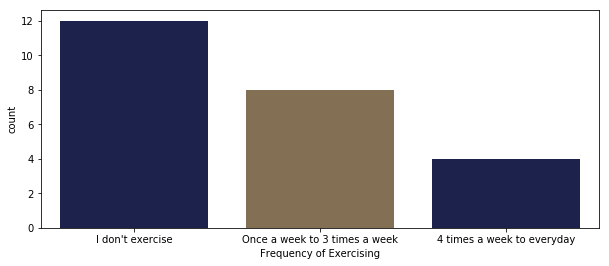

In [165]:
plt.figure(figsize=(10,4))
g = sns.countplot(df['freq_exercise'],palette=smucolors)
g.set(xlabel="Frequency of Exercising")


In [166]:
print("Length before dropping",len(df))

df = df[df.age >= 60]

print("Length after dropping",len(df))

Length before dropping 24
Length after dropping 23


In [167]:
def lower_data(data):
    return data.lower()

df["residence"] = df["residence"].apply(lower_data)

df.loc[df["residence"] == "20 km from bugis","residence"] = 'jurong'
df.head(20)


,gender,age,residence,is_working,freq_brasbash,free_time_activities,interact_w_youth,freq_exercise,exercise_reason,forms_of_exercise,...,understanding_of_tech,why_lack_understanding,kind_of_tech_used,learn_tech_youth,interest_learn_type,know_shop_online,reasons_shop_online,reason_dont,guidance_learn_willingness_shop,type_workshops
0,Female,91,bishan,No,Once a Month,"Stay at home, read newspaper",No,I don't exercise,Lazy,-,...,No understanding （完全不懂）(Tidak ada),Wants to sleep only,Smart Phone （智能手机）(Telefon pintar),No,-,No,-,Use phone to call,No,-
2,Male,81,toa payoh,Yes,Once a Month,"Use FB, brisk walking",Yes,Once a week to 3 times a week,-,Qi gong,...,A little （懂一点点）(Sikit),No need,"Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",No,-,No,-,No need,No,-
3,Female,68,bras basah,Yes,Daily,Sell flowers,Yes,I don't exercise,Not free,-,...,No understanding （完全不懂）(Tidak ada),Never encounter,-,Yes,Smart Phone （智能手机) (Telefon Pintar),No,-,No smart phone,Yes,Not sure
4,Male,61,tampines,Yes,Once a Month,Play and visit friends,Yes,Once a week to 3 times a week,-,Walk only,...,A little （懂一点点）(Sikit),Not sure,"Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",Yes,"Computer （电脑）(Komputer),Smart Phone （智能手机) (Te...",No,-,Don't know how to use the app and make account,Yes,Open to any workshops as long as can attend an...
5,Male,80,marine parade,Yes,Few times a Week,Look after dying people at Dover Park hospice.,No,4 times a week to everyday,-,Walking near his house,...,A little （懂一点点）(Sikit),He does everything manually. He dont use smart...,Computer （电脑）(Komputer),No,-,No,-,He dont even shop. He lives a sinple life. His...,No,No skills. He just want to help people who are...
6,Male,87,tanjong pagar,No,Once a Month,"Go to CC and chat, swimming, qi gong",Yes,4 times a week to everyday,-,"Swimming, brisk walking, qi gong",...,A little （懂一点点）(Sikit),"Too tedious, may appear disconnected because g...","Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",Yes,"Smart Phone （智能手机) (Telefon Pintar),Facebook（脸...",No,-,Because I dont know. Sacred that wife will sco...,Yes,Learn how to send photo using whatsapp
7,Male,60,chinatown,Yes,Daily,"Take a stroll, meet friends",No,4 times a week to everyday,-,"Walking, taking a stroll",...,A little （懂一点点）(Sikit),"Difficult to surf, download games and apps","Smart Phone （智能手机）(Telefon pintar),Facebook （脸...",Yes,"Smart Phone （智能手机) (Telefon Pintar),Other Mobi...",No,-,"Security reasons, product issues",No,"Google, surfing internet, searching for inform..."
8,Male,82,havelock road,No,Few times a Week,Walk,Yes,I don't exercise,He only walks,-,...,A little （懂一点点）(Sikit),He only use smartphone,Smart Phone （智能手机）(Telefon pintar),No,-,No,-,He only does traditional shopping.,No,No skills.
9,Male,82,havelock road,No,Few times a Week,Walk around and use public transport to go around,No,I don't exercise,Dont need to exercise,-,...,A little （懂一点点）(Sikit),Because old already no need,Smart Phone （智能手机）(Telefon pintar),No,-,No,-,"Things maybe more expensive, the item may be f...",No,-
10,Male,70,tanjong pagar,No,Once a Month,"Walk, swimming",Yes,Once a week to 3 times a week,-,"Swmming, walking",...,A little （懂一点点）(Sikit),No platform to learn,"Computer （电脑）(Komputer),Smart Phone （智能手机）(Tel...",Yes,"Computer （电脑）(Komputer),Smart Phone （智能手机) (Te...",No,-,Not safe,Yes,IT related


< 2.5 km --> 1 <br>
< 5km --> 2 <br>
< 7.5km --> 3 <br>
\> 7.5km --> 4 <br>



tanjong pagar - < 2.5km <br>
havelock road - < 2.5km <br>
bras basah - < 2.5km <br>
toa payoh - < 5km <br>
bishan - < 7.5km <br>
tanah merah - > 7.5km <br>
chinatown - < 2.5km <br>
marine parade - < 7.5km <br>
tampines - > 7.5km <br>
cantonment - < 2.5km <br>

In [168]:
def encode_distance(data):
    less_2_half_km = ["tanjong pagar","bras basah","bugis","chinatown","cantonment","havelock road"]
    less_5_km = ["toa payoh","geylang","thomson","dakota"]
    less_7_half_km = ["bishan","marine parade","farrer road","circuit road"]
    more_7_half_km = ["tanah merah", "tampines",'bedok','jurong','sembawang','woodlands','yishun','pasir ris','yio chu kang']
    
    data = data.strip()
    
    if data in less_2_half_km:
        return 1
    if data in less_5_km:
        return 2
    if data in less_7_half_km:
        return 3
    if data in more_7_half_km:
        return 4
    else:
        return -1
    
df["approx_distance_cat"] = df["residence"].apply(encode_distance)
df["approx_distance_cat"]

0     3
2     2
3     1
4     4
5     3
6     1
7     1
8     1
9     1
10    1
11    1
12    4
13    4
14    4
15    4
16    2
17    3
18    4
19    3
20    3
21    2
22    2
23    4
Name: approx_distance_cat, dtype: int64

In [169]:
#Encode Yes/No responses

def encode_yes_no(data):
    if data == 'Yes':
        return 1
    if data == 'No' :
        return 0
    else:
        return -1
    
    
def encode_understanding(data):
    if "No understanding" in data:
        return 0
    if "A little" in data:
        return 1
    if "Very well" in data:
        return 2

#Encode Yes and Nos
df["is_working"] = df["is_working"].apply(encode_yes_no)
df["interact_w_youth"] = df["interact_w_youth"].apply(encode_yes_no)
df["travel_20mins_exercise"] = df["travel_20mins_exercise"].apply(encode_yes_no)
df["incentives_travel"] = df["incentives_travel"].apply(encode_yes_no)
df["visited_smu"] = df["visited_smu"].apply(encode_yes_no)
df["consider_coming"] = df["consider_coming"].apply(encode_yes_no)
df["heard_of_connexion"] = df["heard_of_connexion"].apply(encode_yes_no)
df['learn_tech_youth'] = df['learn_tech_youth'].apply(encode_yes_no)
df["know_shop_online"] = df["know_shop_online"].apply(encode_yes_no)
df["guidance_learn_willingness_shop"] = df["guidance_learn_willingness_shop"].apply(encode_yes_no)

#Encode other numerical data
df["understanding_of_tech"] = df["understanding_of_tech"].apply(encode_understanding)


print(df.dtypes)

gender                             object
age                                 int64
residence                          object
is_working                          int64
freq_brasbash                      object
free_time_activities               object
interact_w_youth                    int64
freq_exercise                      object
exercise_reason                    object
forms_of_exercise                  object
travel_20mins_exercise              int64
incentives_travel                   int64
places_attract_travel              object
visited_smu                         int64
purpose_at_smu                     object
seen_campus_green                  object
impression_campus_green            object
activity_at_campus_green           object
consider_coming                     int64
heard_of_connexion                  int64
understanding_of_tech               int64
why_lack_understanding             object
kind_of_tech_used                  object
learn_tech_youth                  

In [170]:
df["freq_exercise"].value_counts()

I don't exercise                 11
Once a week to 3 times a week     8
4 times a week to everyday        4
Name: freq_exercise, dtype: int64

In [171]:
def encode_freq_exercise(data):
    if data == "4 times a week to everyday":
        return 3
    if data == "Once a week to 3 times a week":
        return 2
    if data == "I don't exercise":
        return 1
    
df["freq_exercise"] = df["freq_exercise"].apply(encode_freq_exercise)

In [172]:
print(df["free_time_activities"])


#Check if elderlies do socialise
def encode_socialise(data):
    data = data.lower()
    data = data.replace(",","")
    data = data.replace(".","")
    socialise_words = ["play","talk","friends","visit","meet","chat","people","family","attending"]
    
    for word in data.split(" "):
        if word in socialise_words:
            return 1
    
    return 0

def encode_volunteer(data):
    data = data.lower()
    data = data.replace(",","")
    data = data.replace(".","")
    socialise_words = ["hospice","voluntary","volunteer"]
    for word in data.split(" "):
        if word in socialise_words:
            return 1

    return 0

0                          Stay at home, read newspaper
2                                Use FB, brisk walking 
3                                          Sell flowers
4                                Play and visit friends
5        Look after dying people at Dover Park hospice.
6                  Go to CC and chat, swimming, qi gong
7                           Take a stroll, meet friends
8                                                  Walk
9     Walk around and use public transport to go around
10                                      Walk, swimming 
11    Exercise 10k steps, attending voluntary work, ...
12                                        Visit parents
13                                            Shopping 
14                            Drink coffee with friends
15                   Chess, talk with friends, swimming
16                 Reach out to people to help the poor
17                         Rest, Meet friends, Exercise
18              Stitch, read books, play compute

In [173]:
df["has_socialise"] = df["free_time_activities"].apply(encode_socialise)
df["has_volunteer"] = df["free_time_activities"].apply(encode_volunteer)


print(df["has_socialise"])
print(df["has_volunteer"])

0     0
2     0
3     0
4     1
5     1
6     1
7     1
8     0
9     0
10    0
11    1
12    1
13    0
14    1
15    1
16    1
17    1
18    1
19    1
20    0
21    1
22    1
23    1
Name: has_socialise, dtype: int64
0     0
2     0
3     0
4     0
5     1
6     0
7     0
8     0
9     0
10    0
11    1
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
Name: has_volunteer, dtype: int64


In [174]:
df["consider_coming"].value_counts()

1    17
0     6
Name: consider_coming, dtype: int64

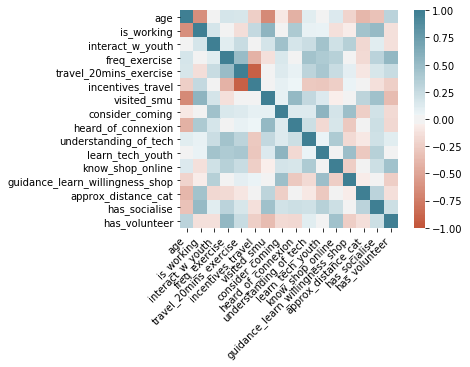

In [175]:
#Correlation of variables in the data
corr = df.corr()

ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [176]:
corr.round(5)

,age,is_working,interact_w_youth,freq_exercise,travel_20mins_exercise,incentives_travel,visited_smu,consider_coming,heard_of_connexion,understanding_of_tech,learn_tech_youth,know_shop_online,guidance_learn_willingness_shop,approx_distance_cat,has_socialise,has_volunteer
age,1.00000,-0.63001,-0.02668,0.17230,0.15635,-0.23392,-0.66318,-0.08060,-0.42303,0.11684,-0.02867,0.13650,-0.20456,-0.37667,-0.31313,0.32018
is_working,-0.63001,1.00000,0.17857,-0.01648,-0.14310,0.26042,0.56354,0.03742,0.39295,0.07705,0.06580,-0.13122,-0.05051,0.44096,0.50892,-0.13122
interact_w_youth,-0.02668,0.17857,1.00000,0.10984,0.24412,0.03005,0.18232,0.46780,0.17776,0.23814,0.44412,0.20412,0.33672,-0.18317,0.11214,-0.13122
freq_exercise,0.17230,-0.01648,0.10984,1.00000,0.50745,-0.40663,-0.12235,0.15539,-0.02302,0.44377,0.38955,0.33184,-0.03107,-0.16066,0.31305,0.53812
travel_20mins_exercise,0.15635,-0.14310,0.24412,0.50745,1.00000,-0.92543,0.01563,0.13231,0.07057,0.31037,0.41096,0.24744,0.09524,-0.09594,0.16265,0.24744
incentives_travel,-0.23392,0.26042,0.03005,-0.40663,-0.92543,1.00000,0.00930,0.07872,0.04198,-0.26715,-0.28601,-0.22899,0.05666,0.03044,-0.12579,-0.22899
visited_smu,-0.66318,0.56354,0.18232,-0.12235,0.01563,0.00930,1.00000,0.07816,0.52105,0.27305,0.13741,-0.04060,-0.01563,0.30540,0.46437,-0.35187
consider_coming,-0.08060,0.03742,0.46780,0.15539,0.13231,0.07872,0.07816,1.00000,0.12745,0.11743,0.56880,0.18334,0.47633,-0.23459,0.18981,-0.16806
heard_of_connexion,-0.42303,0.39295,0.17776,-0.02302,0.07057,0.04198,0.52105,0.12745,1.00000,0.22018,-0.17236,0.16806,-0.27345,-0.01066,0.22597,-0.18334
understanding_of_tech,0.11684,0.07705,0.23814,0.44377,0.31037,-0.26715,0.27305,0.11743,0.22018,1.00000,0.05807,0.37744,-0.15849,-0.08515,0.19623,0.11438


In [177]:

df["preference_of_activity"] = ""

for index, row in df.iterrows():
    if row["consider_coming"] == 1 and row["learn_tech_youth"] == 1:
        df.at[index,"preference_of_activity"] = 3
    elif row["consider_coming"] == 1:
        df.at[index,"preference_of_activity"] = 2
    elif row["learn_tech_youth"] == 1:
        df.at[index,"preference_of_activity"] = 1
    else:
        df.at[index,"preference_of_activity"] = 0

print(df["preference_of_activity"])
df["preference_of_activity"] = df["preference_of_activity"].astype(int)

0     0
2     2
3     3
4     3
5     0
6     3
7     3
8     0
9     2
10    3
11    3
12    0
13    2
14    0
15    3
16    3
17    3
18    3
19    2
20    0
21    2
22    3
23    2
Name: preference_of_activity, dtype: object


In [178]:
def lower_data(data):
    return data.lower()

def encode_distance(data):
    less_2_half_km = ["tanjong pagar","bras basah","bugis","chinatown","cantonment","havelock road"]
    less_5_km = ["toa payoh","geylang","thomson","dakota"]
    less_7_half_km = ["bishan","marine parade","farrer road","circuit road"]
    more_7_half_km = ["tanah merah", "tampines",'bedok','jurong','sembawang','woodlands','yishun','pasir ris','yio chu kang']
    
    data = data.strip()
    
    if data in less_2_half_km:
        return 1
    if data in less_5_km:
        return 2
    if data in less_7_half_km:
        return 3
    if data in more_7_half_km:
        return 4
    else:
        return -1
    
def encode_yes_no(data):
    if data == 'Yes':
        return 1
    if data == 'No' :
        return 0
    else:
        return -1
    
    
def encode_understanding(data):
    if "No understanding" in data:
        return 0
    if "A little" in data:
        return 1
    if "Very well" in data:
        return 2
    
def encode_freq_exercise(data):
    if data == "4 times a week to everyday":
        return 3
    if data == "Once a week to 3 times a week":
        return 2
    if data == "I don't exercise":
        return 1

def encode_socialise(data):
    data = data.lower()
    data = data.replace(",","")
    data = data.replace(".","")
    socialise_words = ["play","talk","friends","visit","meet","chat","people","family","attending"]
    
    for word in data.split(" "):
        if word in socialise_words:
            return 1
    
    return 0

def encode_volunteer(data):
    data = data.lower()
    data = data.replace(",","")
    data = data.replace(".","")
    socialise_words = ["hospice","voluntary","volunteer"]
    for word in data.split(" "):
        if word in socialise_words:
            return 1

    return 0
    
def prepare_data(df):
    for col in df:
        #get dtype for column
        dt = df[col].dtype 
        #check if it is a number
        if dt == int or dt == float:
            df[col] = df[col].fillna(0)
        else:
            df[col] = df[col].fillna("-")
            
        
    df.columns = ['gender','age','residence','is_working','freq_brasbash','free_time_activities','interact_w_youth','freq_exercise'
             ,'exercise_reason','forms_of_exercise','travel_20mins_exercise','incentives_travel','places_attract_travel','visited_smu'
             ,'purpose_at_smu','seen_campus_green','impression_campus_green','activity_at_campus_green','consider_coming','heard_of_connexion','understanding_of_tech'
             ,'why_lack_understanding','kind_of_tech_used','learn_tech_youth','interest_learn_type','know_shop_online','reasons_shop_online','reason_dont','guidance_learn_willingness_shop','type_workshops']
    
    #Filter out those below 60 years old
    df = df[df.age >= 60]
    df["residence"] = df["residence"].apply(lower_data)
    df.loc[df["residence"] == "20 km from bugis","residence"] = 'jurong'
    df["approx_distance_cat"] = df["residence"].apply(encode_distance)
    
    
    ##Encoding Variables
    
    #Encode Yes or No
    df["is_working"] = df["is_working"].apply(encode_yes_no)
    df["interact_w_youth"] = df["interact_w_youth"].apply(encode_yes_no)
    df["travel_20mins_exercise"] = df["travel_20mins_exercise"].apply(encode_yes_no)
    df["incentives_travel"] = df["incentives_travel"].apply(encode_yes_no)
    df["visited_smu"] = df["visited_smu"].apply(encode_yes_no)
    df["consider_coming"] = df["consider_coming"].apply(encode_yes_no)
    df["heard_of_connexion"] = df["heard_of_connexion"].apply(encode_yes_no)
    df['learn_tech_youth'] = df['learn_tech_youth'].apply(encode_yes_no)
    df["know_shop_online"] = df["know_shop_online"].apply(encode_yes_no)
    df["guidance_learn_willingness_shop"] = df["guidance_learn_willingness_shop"].apply(encode_yes_no)

    #Encode other numerical data
    df["understanding_of_tech"] = df["understanding_of_tech"].apply(encode_understanding)
    df["freq_exercise"] = df["freq_exercise"].apply(encode_freq_exercise)
    df["has_socialise"] = df["free_time_activities"].apply(encode_socialise)
    df["has_volunteer"] = df["free_time_activities"].apply(encode_volunteer)
    
    
    df["preference_of_activity"] = ""

    for index, row in df.iterrows():
        if row["consider_coming"] == 1 and row["learn_tech_youth"] == 1:
            df.at[index,"preference_of_activity"] = 3
        elif row["consider_coming"] == 1:
            df.at[index,"preference_of_activity"] = 2
        elif row["learn_tech_youth"] == 1:
            df.at[index,"preference_of_activity"] = 1
        else:
            df.at[index,"preference_of_activity"] = 0

    print(df["preference_of_activity"])
    df["preference_of_activity"] = df["preference_of_activity"].astype(int)

    return df


In [179]:
df = pd.read_csv("elderly_opinions.csv")

for col in df:
    #get dtype for column
    dt = df[col].dtype 
    #check if it is a number
    if dt == int or dt == float:
        df[col] = df[col].fillna(0)
    else:
        df[col] = df[col].fillna("-")
        
df.shape

df=prepare_data(df)

0     0
2     2
3     3
4     3
5     0
6     3
7     3
8     0
9     2
10    3
11    3
12    0
13    2
14    0
15    3
16    3
17    3
18    3
19    2
20    0
21    2
22    3
23    2
Name: preference_of_activity, dtype: object


/Users/eugene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/eugene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/eugene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [180]:


def encode_understanding(data):
    if "No understanding" in data:
        return "No understanding"
    if "A little" in data:
        return "A little"
    if "Very well" in data:
        return "Very well"


    
df["understanding_of_tech"] = df["understanding_of_tech"].apply(encode_understanding)  
print(df["understanding_of_tech"].value_counts(1))
    
g = sns.countplot(df["understanding_of_tech"],palette=smucolors,order=["No understanding","A little","Very well"])
g.set(xlabel="Elderly Understanding of Technology")

TypeError: argument of type 'int' is not iterable

In [ ]:
df["learn_tech_youth"].value_counts()

In [ ]:
little_understanding = df.loc[df["understanding_of_tech"]=="A little"]
little_understanding["learn_tech_youth"].value_counts()

In [ ]:
no_understanding = df.loc[df["understanding_of_tech"]=="No understanding"]
no_understanding["learn_tech_youth"].value_counts()

In [ ]:
very_well_understanding = df.loc[df["understanding_of_tech"]=="Very well"]
very_well_understanding["learn_tech_youth"].value_counts()

In [ ]:
df["has_socialise"].value_counts()

In [ ]:
elderly_has_socialise = df.loc[df["has_socialise"]==1]
elderly_no_socialise = df.loc[df["has_socialise"]==0]

In [192]:
print(elderly_has_socialise["freq_exercise"].value_counts(1).index[3])

IndexError: index 3 is out of bounds for axis 0 with size 3

In [ ]:
elderly_no_socialise["freq_exercise"].value_counts(1)

In [ ]:
elderly_has_socialise["understanding_of_tech"].value_counts(1)

In [152]:
elderly_no_socialise["understanding_of_tech"].value_counts(1)

A little            0.625
No understanding    0.375
Name: understanding_of_tech, dtype: float64

In [153]:
def encode_cat_freq_exercise(data):
    if data == 3:
        return "4 times a week to everyday"
    if data == 2:
        return "Once a week to 3 times a week"
    if data == 1:
        return "I don't exercise"

df["freq_exercise"] = df["freq_exercise"].apply(encode_cat_freq_exercise)




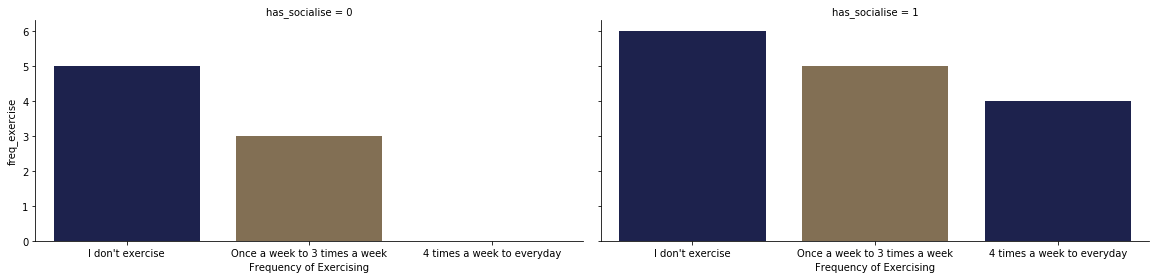

In [157]:
g = sns.FacetGrid(df,col="has_socialise",aspect=2,height=4)
g.map(sns.countplot,"freq_exercise",palette=smucolors,order=["I don't exercise","Once a week to 3 times a week","4 times a week to everyday"])
g.set_axis_labels("Frequency of Exercising", "freq_exercise");

In [ ]:

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]

# Make figure and axes
fig, axs = plt.subplots(2, 2)

# A standard pie plot
axs[0, 0].pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

# Shift the second slice using explode
axs[0, 1].pie(fracs, labels=labels, autopct='%.0f%%', shadow=True,
              explode=(0, 0.1, 0, 0))